In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [28]:
np.random.seed(42)
X,y = make_circles(n_samples=1500,factor=0.1,noise=0.3,random_state=42)

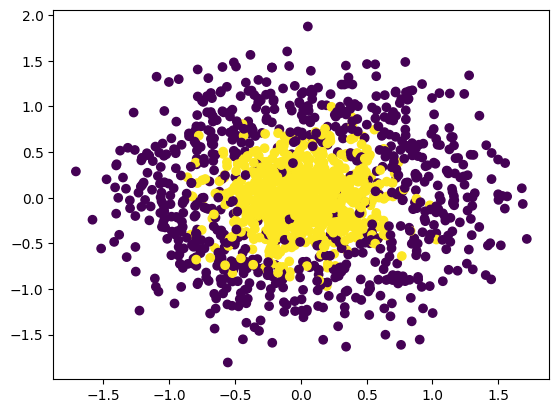

In [29]:
plt.scatter(X[:,0],X[:,1],c=y)

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [31]:
abc = AdaBoostClassifier()

In [32]:
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

np.float64(0.882)

In [33]:
abc.fit(X,y)

AdaBoostClassifier()

In [34]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range = np.linspace(X.min(),X.max(),100)
    xx1,xx2 = np.meshgrid(x_range,x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contour(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
    plt.title('Adaboost Classifier')
    plt.show()

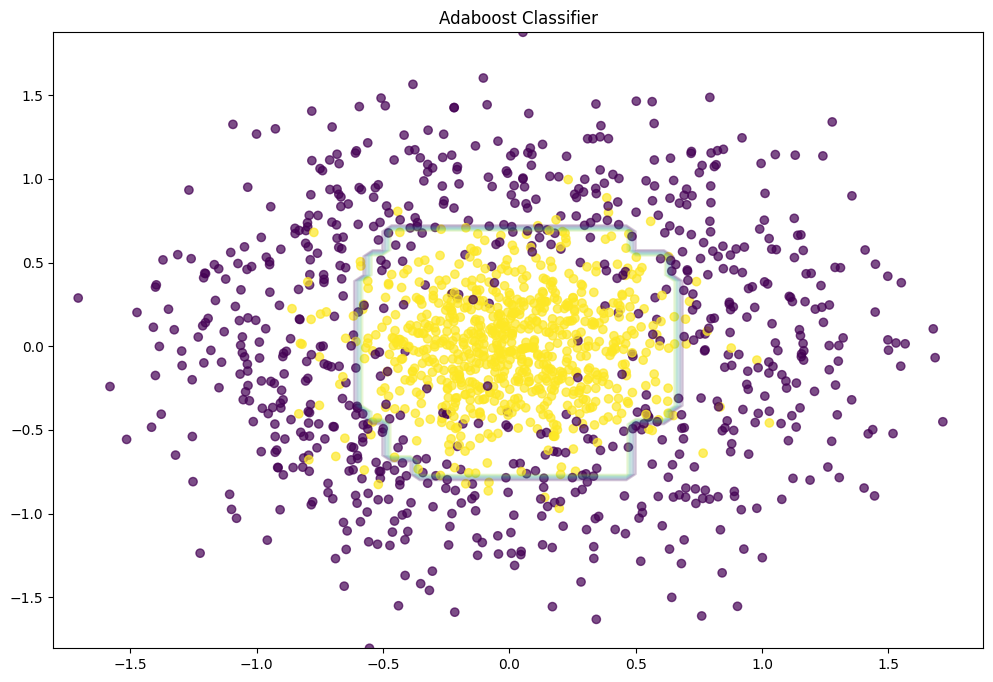

In [35]:
plot_decision_boundary(abc)

In [36]:
abc1 = AdaBoostClassifier(n_estimators=750,learning_rate=0.1)


In [37]:
abc1.fit(X,y)


AdaBoostClassifier(learning_rate=0.1, n_estimators=750)

In [38]:
np.mean(cross_val_score(abc1,X,y,scoring='accuracy',cv=10))


np.float64(0.8846666666666667)

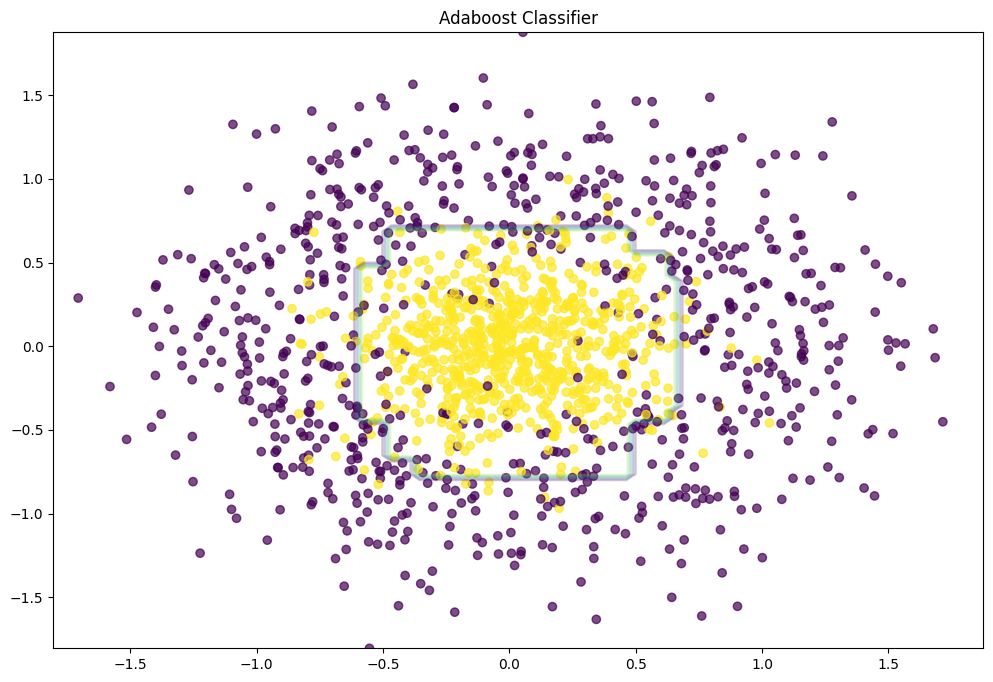

In [39]:
plot_decision_boundary(abc1)

In [40]:
from sklearn.model_selection import GridSearchCV


In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

clf = AdaBoostClassifier() 

In [42]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy',verbose=2)


In [43]:
grid_result = grid_search.fit(X,y)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


f:\ml\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [44]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.884667 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 750}


In [45]:
grid_result.best_estimator_


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=750)